In [40]:
import numpy as np
import pandas as pd
import seaborn as sns

In [24]:
dataset= pd.read_csv('BostonHousing.csv')

In [25]:
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Independent feature and dependent feature

In [26]:
y= dataset['medv']

In [27]:
X= dataset.drop(['medv'], axis=1)

### Train test split

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

### Standardizing the dataset

In [29]:

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [34]:
X_train= scaler.fit_transform(X_train)
# X_train= scaler.inverse_transform(X_train)

In [35]:
X_test= scaler.fit_transform(X_test)
# X_test= scaler.inverse_transform(X_test)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [45]:
regression= LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [46]:
mse= cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

In [47]:
np.mean(mse)

-23.417745560052055

### Prediction

In [49]:
reg_predict= regression.predict(X_test)

In [50]:
reg_predict

array([ 6.82850109, 20.04881778, 25.52202447, 26.89992349, 31.768147  ,
       24.83734925,  6.57086845, 16.32371992, 32.09705034, 31.58192325,
       28.78712292, 14.52107739, 21.73461205, 22.36705877, 26.0576454 ,
       23.62081555, 18.40905604, 36.83412528,  9.76600179, 22.3053056 ,
       38.65986129, 19.61290581, 17.5645982 , 34.99663421, 19.50477454,
       18.47036962, 18.89400653, 21.08432241, 22.35872096, 16.30047996,
       30.21039867, 11.7906632 , 41.2420496 , 30.06349933, 28.45035263,
       13.13487759, 31.73132606, 16.7071642 , 21.43594931, 20.36926437,
       25.60308627, 13.26239117, 21.51340667, 24.35640127, 17.95684666,
       16.80587496, 14.34986941, 32.66498843, 35.47122805, 23.70214717,
       23.29782368, 27.01214214, 22.54043206, 24.91111158, 18.48138465,
       20.64177766, 35.60529326, 12.4085806 , 34.09121601, 19.84719813,
       19.7288601 ,  4.6478661 , 29.52603453, 36.02080729, 17.91233925,
       11.3393203 , 12.11839758, 25.23309912, 19.24768303, 18.31

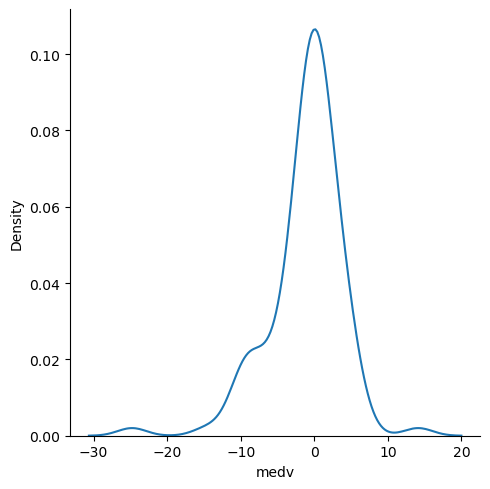

In [53]:
sns.displot(reg_predict - y_test, kind='kde')

In [54]:
from sklearn.metrics import r2_score
score= r2_score(reg_predict, y_test)
score

0.6364977292184937